In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset

import pandas, numpy, random
import matplotlib.pyplot as plt

In [ ]:
def generate_random(size):
  random_data = torch.rand(size)
  return random_data

In [ ]:
class MnistDataset(Dataset):

    def __init__(self, csv_file):
        self.data_df = pandas.read_csv(csv_file, header=None)
        pass

    def __len__(self):
        return len(self.data_df)

    def __getitem__(self, index):
        # image target (label)
        label = self.data_df.iloc[index,0]
        target = torch.zeros((10))
        target[label] = 1.0

        # image data, normalised from 0-255 to 0-1
        image_values = torch.FloatTensor(self.data_df.iloc[index,1:].values) / 255.0

        # return label, image data tensor and target tensor
        return label, image_values, target
    def plot_image(self, index):
      arr = self.data_df.iloc[index,1:].values.reshape(28,28)
      plt.title("label = " + str(self.data_df.iloc[index,0]))
      plt.imshow(arr, interpolation='none', cmap='Blues')
      pass

    pass

In [ ]:
mnist_dataset = MnistDataset('drive/MyDrive/mnist_data/mnist_train.csv')

In [ ]:
class Discriminator(nn.Module):

  def __init__(self):
    super().__init__()

    self.model = nn.Sequential(
        nn.Linear(784, 200),
        nn.Sigmoid(),
        nn.Linear(200, 1),
        nn.Sigmoid()
    )

    self.loss_function = nn.MSELoss()

    self.optimiser = torch.optim.SGD(self.parameters(), lr=0.01)

    self.counter = 0
    self.progress = []

  def forward(self, inputs):
    return self.model(inputs)

  def train(self, inputs, targets):

    outputs = self.forward(inputs)

    loss = self.loss_function(outputs, targets)

    self.counter += 1
    if self.counter % 10 == 0:
      self.progress.append(loss.item())
      pass
    if self.counter % 10000 == 0:
      print("counter = ", self.counter)
      pass

    self.optimiser.zero_grad()
    loss.backward()
    self.optimiser.step()

    pass

  def plot_progress(self):
    df = pandas.DataFrame(self.progress, columns=['loss'])
    df.plot(ylim=(0, 1.0), figsize=(16,8), alpha=0.1, marker='.', grid=True, yticks=(0, 0.25, 0.5))
    pass

In [ ]:
D = Discriminator()

for label, image_data_tensor, target_tensor in mnist_dataset:
    # real data
    D.train(image_data_tensor, torch.FloatTensor([1.0]))
    # fake data
    D.train(generate_random(784), torch.FloatTensor([0.0]))
    pass

counter =  10000
counter =  20000
counter =  30000
counter =  40000
counter =  50000
counter =  60000
counter =  70000
counter =  80000
counter =  90000
counter =  100000
counter =  110000
counter =  120000


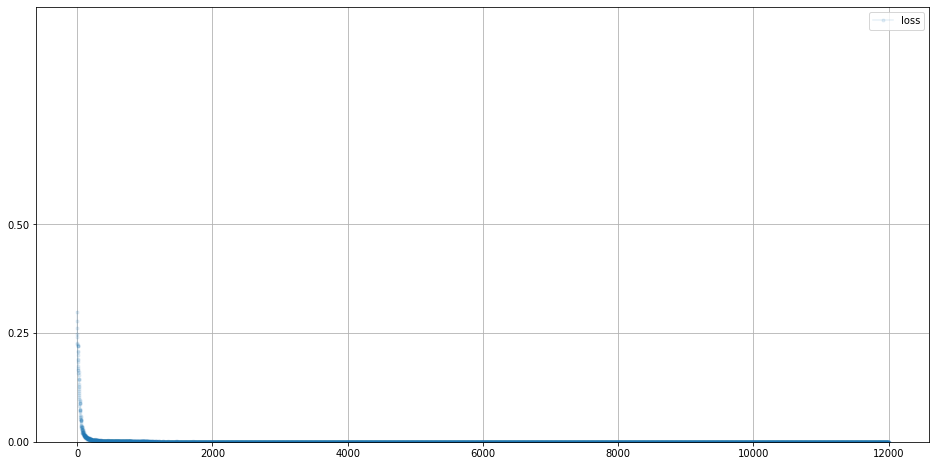

In [ ]:
D.plot_progress()

In [ ]:
for i in range(4):
  image_data_tensor = mnist_dataset[random.randint(0,60000)][1]
  print(D.forward(image_data_tensor).item())
  pass
for i in range(4):
  print(D.forward(generate_random(784)).item())
  pass

0.9889935851097107
0.9854986667633057
0.9956551790237427
0.9956710338592529
0.006587362382560968
0.004519751761108637
0.004058242775499821
0.006574216764420271
